In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [2]:
oneplus_reviews=[]

In [3]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [4]:
reviews = list(set(oneplus_reviews))

In [5]:
reviews

["\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED. PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE. THERE ARE SO MANY CONS IN THIS PHONE. EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED.HERE ARE MY CONCERNS1. SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR. THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN. IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T. PHONE RATIO IS 20:9 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE. IMAGES ON THE SCREEN IS SO BLURRRY2. DESIGN OF THE PHONE IS MESS. SO MUCH CAMERA BULK. EVEN THE PROVIDED CASE CANNOT PROTECT IT FROM SCRATCHES. PHONE IS VERY FAT AND HAEVY. LENGTH IS ALSO TOO MUCH BECAUSE OF THE RATIO. ALSO THERE IS NO PREMIUM FEELING AFTER HOLDING THIS PHONE AS WAS WITH THE ONE PLUS 5T.3. 3.5MM JACK IS BIG OMMISSION SINCE ONE PLUS 6 PHONE. THERE IS NO BENEFIT OF REMOVING IT. THERE IS NO BIGGER BA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
reviews = pd.DataFrame(reviews)

In [8]:
reviews

,0
0,\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER P...
1,"\nYou can also go to my youtube channel - ""Cur..."
2,"\nThis phone has great performance, good camer..."
3,\nAwesome experience..best in class camera... ...
4,\nNo earphone jack\n
5,\nI received One Plus 7T 2 days back. I will d...
6,\nA One plus user.Oneplus One -> Oneplus 3T ->...
7,\nAfter reading a lot of geeky reviews on YouT...
8,\nDetailed review --Design - 4/5+Reduced notch...
9,\nMy first one+7t & its make me so sad. I rece...


In [9]:
reviews.rename({0 : 'review'} , axis = 1 , inplace = True )

In [10]:
reviews

,review
0,\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER P...
1,"\nYou can also go to my youtube channel - ""Cur..."
2,"\nThis phone has great performance, good camer..."
3,\nAwesome experience..best in class camera... ...
4,\nNo earphone jack\n
5,\nI received One Plus 7T 2 days back. I will d...
6,\nA One plus user.Oneplus One -> Oneplus 3T ->...
7,\nAfter reading a lot of geeky reviews on YouT...
8,\nDetailed review --Design - 4/5+Reduced notch...
9,\nMy first one+7t & its make me so sad. I rece...


In [11]:
reviews =[Text.strip() for Text in reviews.review]

In [12]:
reviews = [Text for Text in reviews if Text]

In [13]:
text=' '.join(reviews)

In [14]:
text

'THIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED. PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE. THERE ARE SO MANY CONS IN THIS PHONE. EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED.HERE ARE MY CONCERNS1. SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR. THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN. IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T. PHONE RATIO IS 20:9 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE. IMAGES ON THE SCREEN IS SO BLURRRY2. DESIGN OF THE PHONE IS MESS. SO MUCH CAMERA BULK. EVEN THE PROVIDED CASE CANNOT PROTECT IT FROM SCRATCHES. PHONE IS VERY FAT AND HAEVY. LENGTH IS ALSO TOO MUCH BECAUSE OF THE RATIO. ALSO THERE IS NO PREMIUM FEELING AFTER HOLDING THIS PHONE AS WAS WITH THE ONE PLUS 5T.3. 3.5MM JACK IS BIG OMMISSION SINCE ONE PLUS 6 PHONE. THERE IS NO BENEFIT OF REMOVING IT. THERE IS NO BIGGER BATTE

In [15]:
len(text)

9539

In [16]:
import re

In [17]:
text = re.sub('http://\S+|https://\S+', '', text)

In [18]:
text = re.sub('!+(?=.*\!)','',text)

In [19]:
text = re.sub("[0-9" "]+"," ",text)

In [20]:
text = re.sub("[^A-Za-z" "]+"," ",text)

In [21]:
text = re.sub(r'\d+', '', text)

In [22]:
len(text)

9062

In [23]:
no_punc_text= text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'THIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE THERE ARE SO MANY CONS IN THIS PHONE EARLIER I HAVE USED ONE PLUS T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED HERE ARE MY CONCERNS SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS T OR T PHONE RATIO IS SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE IMAGES ON THE SCREEN IS SO BLURRRY DESIGN OF THE PHONE IS MESS SO MUCH CAMERA BULK EVEN THE PROVIDED CASE CANNOT PROTECT IT FROM SCRATCHES PHONE IS VERY FAT AND HAEVY LENGTH IS ALSO TOO MUCH BECAUSE OF THE RATIO ALSO THERE IS NO PREMIUM FEELING AFTER HOLDING THIS PHONE AS WAS WITH THE ONE PLUS T MM JACK IS BIG OMMISSION SINCE ONE PLUS PHONE THERE IS NO BENEFIT OF REMOVING IT THERE IS NO BIGGER BATTERY ALSO YOU HAVE TO BUY A SEPERATE 

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
text_tokens = word_tokenize(no_punc_text)

In [26]:
text_tokens

['THIS',
 'IS',
 'ONE',
 'OF',
 'THE',
 'WORST',
 'PHONE',
 'I',
 'HAVE',
 'EVER',
 'PURCHASED',
 'PLEASE',
 'DONT',
 'BUY',
 'THIS',
 'PHONE',
 'AND',
 'PUT',
 'YOUR',
 'HARD',
 'EARNED',
 'MONEY',
 'ON',
 'STAKE',
 'THERE',
 'ARE',
 'SO',
 'MANY',
 'CONS',
 'IN',
 'THIS',
 'PHONE',
 'EARLIER',
 'I',
 'HAVE',
 'USED',
 'ONE',
 'PLUS',
 'T',
 'PHONE',
 'SO',
 'I',
 'KNEW',
 'WHAT',
 'TO',
 'EXPECT',
 'FROM',
 'THIS',
 'PHONE',
 'BUT',
 'THIS',
 'TIME',
 'I',
 'AM',
 'SO',
 'MUCH',
 'DISAPPOINTED',
 'HERE',
 'ARE',
 'MY',
 'CONCERNS',
 'SCREEN',
 'RESOLUTION',
 'AND',
 'QUALITY',
 'OF',
 'THE',
 'SCREEN',
 'IS',
 'SO',
 'POOR',
 'THERE',
 'IS',
 'GRAINS',
 'AND',
 'COLOR',
 'BANDING',
 'ISSUE',
 'IN',
 'SCREEN',
 'IMAGES',
 'LOOKS',
 'GRAINY',
 'AND',
 'UNSHARP',
 'IN',
 'COMPARISION',
 'TO',
 'ONE',
 'PLUS',
 'T',
 'OR',
 'T',
 'PHONE',
 'RATIO',
 'IS',
 'SO',
 'INSTAGRAM',
 'IMAGES',
 'WILL',
 'BE',
 'IN',
 'SHOWN',
 'IN',
 'PORTRAIT',
 'MODE',
 'INSTEAD',
 'OF',
 'LANDSCAPE',
 'MODE'

In [27]:
len(text_tokens)

1717

In [28]:
from nltk.corpus import stopwords

In [29]:
my_stop_words=stopwords.words('english')

In [30]:
no_stop_tokens=[word for word in text_tokens if word not in my_stop_words]

In [31]:
no_stop_tokens

['THIS',
 'IS',
 'ONE',
 'OF',
 'THE',
 'WORST',
 'PHONE',
 'I',
 'HAVE',
 'EVER',
 'PURCHASED',
 'PLEASE',
 'DONT',
 'BUY',
 'THIS',
 'PHONE',
 'AND',
 'PUT',
 'YOUR',
 'HARD',
 'EARNED',
 'MONEY',
 'ON',
 'STAKE',
 'THERE',
 'ARE',
 'SO',
 'MANY',
 'CONS',
 'IN',
 'THIS',
 'PHONE',
 'EARLIER',
 'I',
 'HAVE',
 'USED',
 'ONE',
 'PLUS',
 'T',
 'PHONE',
 'SO',
 'I',
 'KNEW',
 'WHAT',
 'TO',
 'EXPECT',
 'FROM',
 'THIS',
 'PHONE',
 'BUT',
 'THIS',
 'TIME',
 'I',
 'AM',
 'SO',
 'MUCH',
 'DISAPPOINTED',
 'HERE',
 'ARE',
 'MY',
 'CONCERNS',
 'SCREEN',
 'RESOLUTION',
 'AND',
 'QUALITY',
 'OF',
 'THE',
 'SCREEN',
 'IS',
 'SO',
 'POOR',
 'THERE',
 'IS',
 'GRAINS',
 'AND',
 'COLOR',
 'BANDING',
 'ISSUE',
 'IN',
 'SCREEN',
 'IMAGES',
 'LOOKS',
 'GRAINY',
 'AND',
 'UNSHARP',
 'IN',
 'COMPARISION',
 'TO',
 'ONE',
 'PLUS',
 'T',
 'OR',
 'T',
 'PHONE',
 'RATIO',
 'IS',
 'SO',
 'INSTAGRAM',
 'IMAGES',
 'WILL',
 'BE',
 'IN',
 'SHOWN',
 'IN',
 'PORTRAIT',
 'MODE',
 'INSTEAD',
 'OF',
 'LANDSCAPE',
 'MODE'

In [32]:
len(no_stop_tokens)

1146

In [33]:
lower =[Text.lower() for Text in no_stop_tokens]

In [34]:
from nltk.stem import PorterStemmer

In [35]:
ps=PorterStemmer()

In [36]:
stem_token = [ps.stem(text) for text in lower ]

In [37]:
nlp =spacy.load('en_core_web_sm')

In [38]:
doc=nlp(' '.join(lower))

In [39]:
doc

this is one of the worst phone i have ever purchased please dont buy this phone and put your hard earned money on stake there are so many cons in this phone earlier i have used one plus t phone so i knew what to expect from this phone but this time i am so much disappointed here are my concerns screen resolution and quality of the screen is so poor there is grains and color banding issue in screen images looks grainy and unsharp in comparision to one plus t or t phone ratio is so instagram images will be in shown in portrait mode instead of landscape mode images on the screen is so blurrry design of the phone is mess so much camera bulk even the provided case can not protect it from scratches phone is very fat and haevy length is also too much because of the ratio also there is no premium feeling after holding this phone as was with the one plus t mm jack is big ommission since one plus phone there is no benefit of removing it there is no bigger battery also you have to buy a seperate 

In [40]:
lemmas= [text.lemma_ for text in doc]

In [41]:
stops = ['-PRON-' , 'youtube' , 'channel']

In [42]:
lemmas =[word for word in lemmas if word not in stops]

In [43]:
len(lemmas)

1126

In [44]:
clean_lemmas=' '.join(lemmas)
clean_lemmas

'this be one of the bad phone i have ever purchase please do not buy this phone and put hard earn money on stake there be so many con in this phone earlier i have use one plus t phone so i know what to expect from this phone but this time i be so much disappointed here be concern screen resolution and quality of the screen be so poor there be grain and color band issue in screen image look grainy and unsharp in comparision to one plus t or t phone ratio be so instagram image will be in show in portrait mode instead of landscape mode image on the screen be so blurrry design of the phone be mess so much camera bulk even the provide case can not protect from scratch phone be very fat and haevy length be also too much because of the ratio also there be no premium feeling after hold this phone as be with the one plus t mm jack be big ommission since one plus phone there be no benefit of remove there be no big battery also have to buy a seperate adapter or new blutooth earphone and blutooth 

In [45]:
clean_tokens = word_tokenize(clean_lemmas)

In [46]:
clean_tokens

['this',
 'be',
 'one',
 'of',
 'the',
 'bad',
 'phone',
 'i',
 'have',
 'ever',
 'purchase',
 'please',
 'do',
 'not',
 'buy',
 'this',
 'phone',
 'and',
 'put',
 'hard',
 'earn',
 'money',
 'on',
 'stake',
 'there',
 'be',
 'so',
 'many',
 'con',
 'in',
 'this',
 'phone',
 'earlier',
 'i',
 'have',
 'use',
 'one',
 'plus',
 't',
 'phone',
 'so',
 'i',
 'know',
 'what',
 'to',
 'expect',
 'from',
 'this',
 'phone',
 'but',
 'this',
 'time',
 'i',
 'be',
 'so',
 'much',
 'disappointed',
 'here',
 'be',
 'concern',
 'screen',
 'resolution',
 'and',
 'quality',
 'of',
 'the',
 'screen',
 'be',
 'so',
 'poor',
 'there',
 'be',
 'grain',
 'and',
 'color',
 'band',
 'issue',
 'in',
 'screen',
 'image',
 'look',
 'grainy',
 'and',
 'unsharp',
 'in',
 'comparision',
 'to',
 'one',
 'plus',
 't',
 'or',
 't',
 'phone',
 'ratio',
 'be',
 'so',
 'instagram',
 'image',
 'will',
 'be',
 'in',
 'show',
 'in',
 'portrait',
 'mode',
 'instead',
 'of',
 'landscape',
 'mode',
 'image',
 'on',
 'the',
 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewsscv=cv.fit_transform(clean_tokens)

In [56]:
vals = pd.Series(cv.vocabulary_.values())

In [58]:
word_list = pd.Series(cv.vocabulary_.keys())


In [61]:
freq_words = pd.DataFrame({'words' : word_list , 'frequency' : vals})

In [62]:
freq_words

,words,frequency
0,this,439
1,be,42
2,one,306
3,of,301
4,the,433
...,...,...
495,how,217
496,consumer,103
497,aspect,27
498,repute,375


In [63]:
freq_words.sort_values(by='words', ascending=False)

,words,frequency
393,zoom,499
337,year,498
350,write,497
465,wound,496
411,would,495
...,...,...
397,all,4
83,after,3
463,add,2
236,adaptor,1


In [65]:
pip install vaderSentiment

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [67]:
analyzer = SentimentIntensityAnalyzer()
for word in clean_tokens:
    vs = analyzer.polarity_scores(word)
    print("{:-<65} {}".format(word, str(vs)))

this------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
be--------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
one-------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
of--------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the-------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bad-------------------------------------------------------------- {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}
phone------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i---------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
have--------------------------------

In [68]:
score_clean_tweets = analyzer.polarity_scores(clean_lemmas)
score_clean_tweets

{'compound': 0.9997, 'neg': 0.069, 'neu': 0.718, 'pos': 0.214}

In [69]:
emotion_lexicon = pd.read_csv('/content/Afinn.csv', encoding="ISO-8859-1")

In [70]:
emotion_lexicon 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [71]:
emo_words = emotion_lexicon ['word'].tolist()

In [72]:
emo_review = [word for word in clean_tokens if word in emo_words]

In [73]:
emo_review

['bad',
 'please',
 'hard',
 'disappointed',
 'poor',
 'mess',
 'protect',
 'no',
 'feeling',
 'big',
 'no',
 'benefit',
 'no',
 'big',
 'good',
 'no',
 'increase',
 'happy',
 'win',
 'recommend',
 'please',
 'waste',
 'good',
 'good',
 'beautiful',
 'improvement',
 'good',
 'natural',
 'like',
 'good',
 'free',
 'top',
 'no',
 'best',
 'like',
 'want',
 'flagship',
 'like',
 'great',
 'helpful',
 'useful',
 'please',
 'great',
 'good',
 'awesome',
 'good',
 'love',
 'no',
 'excellent',
 'amaze',
 'stunning',
 'amazing',
 'good',
 'better',
 'good',
 'like',
 'love',
 'problem',
 'top',
 'great',
 'worried',
 'good',
 'stable',
 'clear',
 'free',
 'want',
 'happy',
 'excitement',
 'like',
 'good',
 'miss',
 'natural',
 'good',
 'welcome',
 'clear',
 'good',
 'no',
 'join',
 'disappointment',
 'problem',
 'like',
 'leave',
 'clear',
 'no',
 'recommend',
 'hope',
 'trust',
 'recommend',
 'great',
 'smart',
 'good',
 'amazing',
 'miss',
 'mess',
 'clear',
 'sad',
 'defect',
 'pay']

In [74]:
emo_rev = pd.DataFrame(emo_review , columns = ['word'])

In [75]:
emo_rev

,word
0,bad
1,please
2,hard
3,disappointed
4,poor
...,...
93,mess
94,clear
95,sad
96,defect


In [76]:
emotions_in_review = pd.merge(emo_rev , emotion_lexicon , on = "word")

In [77]:
emotions_in_review

,word,value
0,bad,-3
1,please,1
2,please,1
3,please,1
4,hard,-1
...,...,...
93,trust,1
94,smart,1
95,sad,-2
96,defect,-3


In [90]:
# Sentiment score of the whole review
emotions_in_review['value'].describe()

count    98.000000
mean      1.224490
std       1.902416
min      -3.000000
25%      -0.500000
50%       2.000000
75%       3.000000
max       4.000000
Name: value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


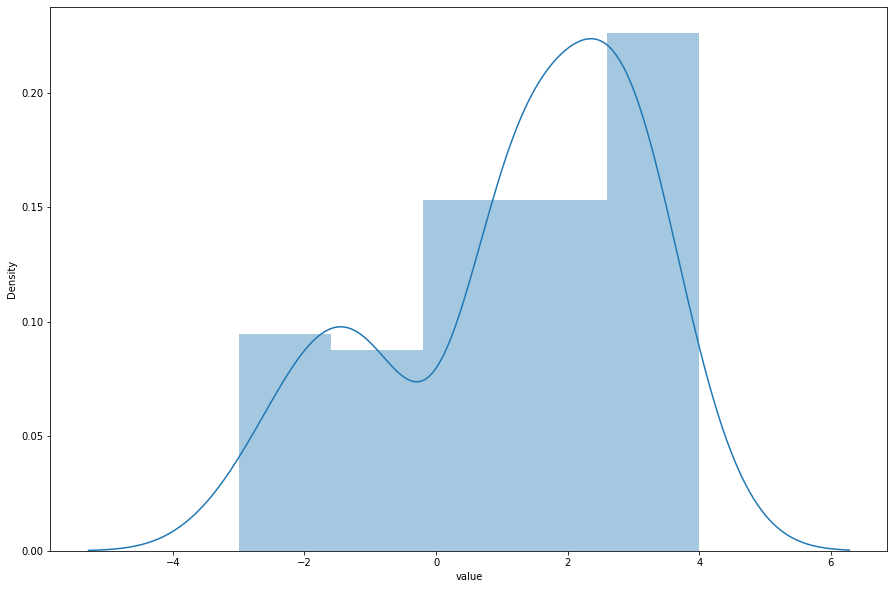

In [89]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(emotions_in_review['value'])

In [78]:
pstv_words = []

p = open('/content/postv.txt')
for word in p.read().split():
    pstv_words.append(word)

# Positve words in Amazon review of oneplus phone

In [83]:
positive_emotions = [word for word in emo_review if word in pstv_words]

In [84]:
positive_emotions

['protect',
 'benefit',
 'good',
 'happy',
 'win',
 'recommend',
 'good',
 'good',
 'beautiful',
 'improvement',
 'good',
 'like',
 'good',
 'free',
 'top',
 'best',
 'like',
 'like',
 'great',
 'helpful',
 'useful',
 'great',
 'good',
 'awesome',
 'good',
 'love',
 'excellent',
 'amaze',
 'stunning',
 'amazing',
 'good',
 'better',
 'good',
 'like',
 'love',
 'top',
 'great',
 'good',
 'stable',
 'clear',
 'free',
 'happy',
 'excitement',
 'like',
 'good',
 'good',
 'welcome',
 'clear',
 'good',
 'like',
 'clear',
 'recommend',
 'trust',
 'recommend',
 'great',
 'smart',
 'good',
 'amazing',
 'clear']

In [85]:
neg_words = []

f = open('/content/negs.txt')
for word in f.read().split():
    neg_words.append(word)

# Negative words in  Amazon review of oneplus phone

In [87]:
negative_emotions = [word for word in emo_review if word in neg_words]

In [88]:
negative_emotions

['bad',
 'hard',
 'disappointed',
 'poor',
 'mess',
 'waste',
 'problem',
 'worried',
 'miss',
 'disappointment',
 'problem',
 'miss',
 'mess',
 'sad',
 'defect']

# **As we can see the number of negative words are less compared to the positive ones also the mean of the sentiment scores are positive , so we can conclude that the overall sentiment of the amazon review of the oneplus phone is Positive**